<a href="https://colab.research.google.com/github/approjecthub/Machine-learning/blob/master/cnn_keras_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam, RMSprop

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
NB_EPOCH = 20
NB_CLASSES = 10 #CIFAR_10 dataset has 10 training classes
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

In [3]:
#load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 

170500096/170498071 [==============================] - 6s 0us/step
X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


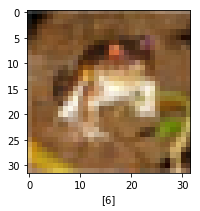

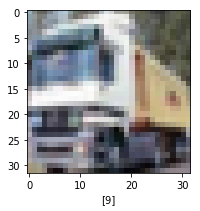

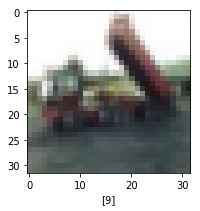

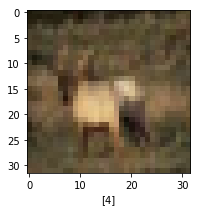

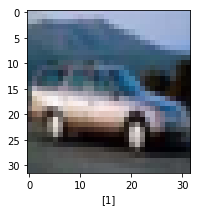

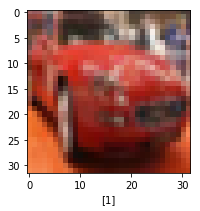

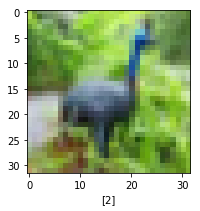

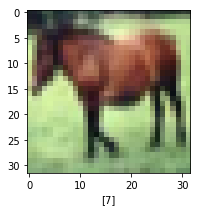

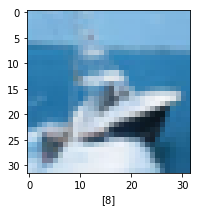

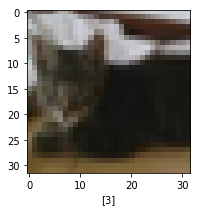

In [7]:
#Visualise some training images
for i in range(10):
  plt.figure(figsize=(4, 3))
  plt.imshow(X_train[i].reshape(32,32,3)/255.)
  plt.xlabel(y_train[i])

<b> All images are label encoded like 3(Cat), 9(truck) etc.

In [0]:
# convert to categorical
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES) 


In [0]:
# float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [11]:
# network

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.summary()


W0625 10:31:04.043504 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 10:31:04.047235 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 10:31:04.052114 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 10:31:04.095282 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 10:31:04.099084 140442137008000 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [12]:
# train
#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
	epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE)
 
print('Testing...')
score = model.evaluate(X_test, Y_test,
                     batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

#server.launch(model)


W0625 10:31:08.853319 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0625 10:31:08.875051 140442137008000 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0625 10:31:09.022194 140442137008000 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 11s 280us/step - loss: 1.7253 - acc: 0.3882 - val_loss: 1.3664 - val_acc: 0.5278
Epoch 2/20
40000/40000 [==============================] - 5s 130us/step - loss: 1.3614 - acc: 0.5195 - val_loss: 1.2492 - val_acc: 0.5696
Epoch 3/20
40000/40000 [==============================] - 5s 130us/step - loss: 1.2361 - acc: 0.5636 - val_loss: 1.1913 - val_acc: 0.5763
Epoch 4/20
40000/40000 [==============================] - 5s 130us/step - loss: 1.1467 - acc: 0.5975 - val_loss: 1.2560 - val_acc: 0.5485
Epoch 5/20
40000/40000 [==============================] - 5s 131us/step - loss: 1.0809 - acc: 0.6236 - val_loss: 1.1154 - val_acc: 0.6160
Epoch 6/20
40000/40000 [==============================] - 5s 130us/step - loss: 1.0166 - acc: 0.6447 - val_loss: 1.0428 - val_acc: 0.6416
Epoch 7/20
40000/40000 [==============================] - 5s 130us/step - loss: 0.9614 - acc: 0.6632 - val_loss: 1.0573 -

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


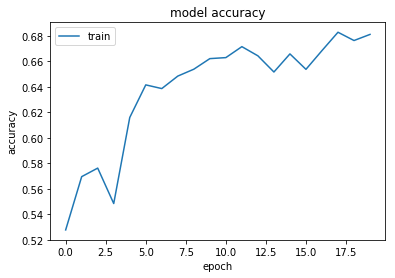

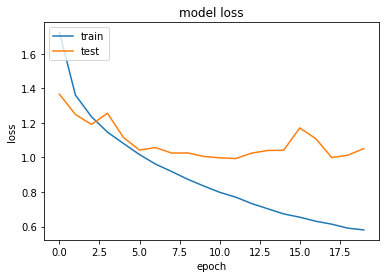

In [13]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

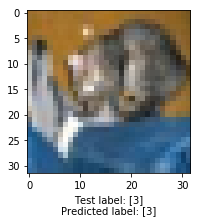

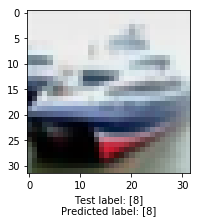

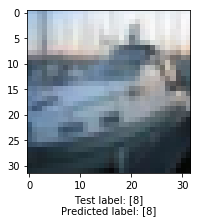

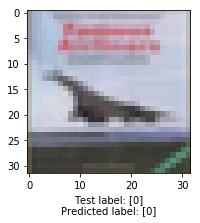

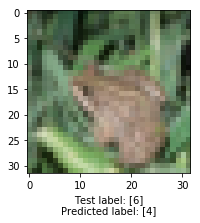

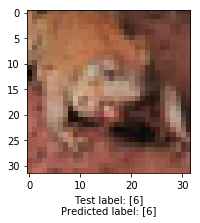

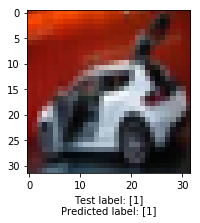

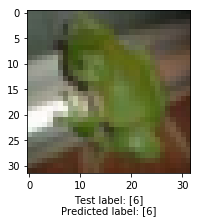

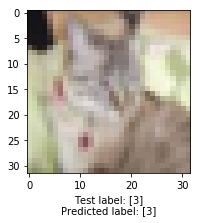

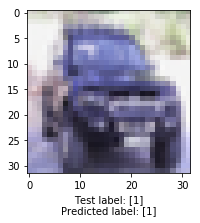

In [20]:
#Visualise our results on some test images
import numpy as np

for i in range(10):
  plt.figure(figsize=(4, 3))
  plt.imshow(X_test[i].reshape(32,32,3))
  plt.xlabel("Test label: "+str(y_test[i])+"\n"+ "Predicted label: ["+ str(np.argmax(model.predict(X_test[i].reshape(1,32,32,3))))+"]")

In [0]:
model.save("")